In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
#import dataset from drive
df= pd.read_csv("/content/drive/MyDrive/office dataset/all_data_32.csv")
df.head()

,Unnamed: 0,device_id,timestamp,date_time,x,x_g,y,y_g,z,z_g,rumination
0,0,S1006,1644447600,10/02/2022-05:00:00,-57,-8.737031,-14,-2.145938,-15,-2.299219,1
1,1,S1006,1644447601,10/02/2022-05:00:00,-59,-9.043594,-14,-2.145938,-16,-2.452500,1
2,2,S1006,1644447601,10/02/2022-05:00:01,-57,-8.737031,-14,-2.145938,-14,-2.145938,1
3,3,S1006,1644447602,10/02/2022-05:00:01,-56,-8.583750,-12,-1.839375,-14,-2.145938,1
4,4,S1006,1644447602,10/02/2022-05:00:02,-57,-8.737031,-14,-2.145938,-14,-2.145938,1


In [20]:
df1=df.drop(columns=['Unnamed: 0','device_id', 'timestamp','date_time','x_g','y_g','z_g' ])

In [21]:
df1.shape

(831362, 4)

In [22]:
df1.isnull().sum()

x             0
y             0
z             0
rumination    0
dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831362 entries, 0 to 831361
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   x           831362 non-null  int64
 1   y           831362 non-null  int64
 2   z           831362 non-null  int64
 3   rumination  831362 non-null  int64
dtypes: int64(4)
memory usage: 25.4 MB


In [24]:
df1.isnull().values.any()

False

In [25]:
df1.corr()

,x,y,z,rumination
x,1.000000,-0.167331,-0.171027,0.124163
y,-0.167331,1.000000,-0.026324,-0.460487
z,-0.171027,-0.026324,1.000000,-0.020730
rumination,0.124163,-0.460487,-0.020730,1.000000


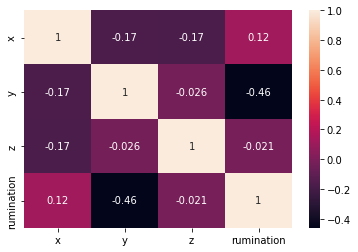

In [26]:
#visualizing the correlation matrix
import seaborn as sns

correlationmatrix= df1.corr()
top_correlated_features= correlationmatrix.index


sns.heatmap(df1[top_correlated_features].corr(), annot= True)

In [27]:
print(df1)

         x   y   z  rumination
0      -57 -14 -15           1
1      -59 -14 -16           1
2      -57 -14 -14           1
3      -56 -12 -14           1
4      -57 -14 -14           1
...     ..  ..  ..         ...
831357 -55  -1  -1           0
831358 -58  -9  -3           0
831359 -76 -18   1           0
831360 -59  -8  -8           0
831361 -64 -10  -3           0

[831362 rows x 4 columns]


In [31]:
#Splitting our datset
from sklearn.model_selection import train_test_split
X= df1.iloc[:,0:3]
Y=df1.iloc[: , -1]
print(X.head())
print(Y.head())

    x   y   z
0 -57 -14 -15
1 -59 -14 -16
2 -57 -14 -14
3 -56 -12 -14
4 -57 -14 -14
0    1
1    1
2    1
3    1
4    1
Name: rumination, dtype: int64


In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [36]:
#Hyperparameter Tuning using RandomizedSearchCV
params= {
    "learning_rate"     : [0.05, 0.1, 0.10, 0.15, 0.2, 0.25, 0.3],
    "max_depth"         : [3,4,6,7,8,10, 12,15],
    "min_child_weight"  : [1,3,5,7],
    "gamma"             : [0.0,0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree"  : [0.3,0.4, 0.5, 0.6, 0.7]
}

In [37]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)